In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "pca_iris.data"

df = pd.read_csv(url , names=['sepal length','sepal witdh','petal length','petal witdh','target'])
df

,sepal length,sepal witdh,petal length,petal witdh,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
features = ['sepal length','sepal witdh','petal length','petal witdh']

x=df[features]

y=df[['target']]

In [34]:
#Standardizing the features
x=StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [35]:
#what size are you going to induce it to?
pca = PCA(n_components=2)
#Fitting to 2 Dimensional Dataset
principalComponents = pca.fit_transform(x)
#It's tranforming matris to data frame
principalDf =pd.DataFrame(data = principalComponents,columns=['principal component 1','principal component 2'])



In [36]:

#we crated the new 2 dimensional dataset
#principal component 1 and 2 doesnt include one of sepal or petal datas .we cant say the components belong one of them data set,the our new sets are uncertain.
principalDf  

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [37]:
#Adding target to new PCA dataframe
final_dataframe = pd.concat([principalDf,df[['target']]], axis = 1)

final_dataframe.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


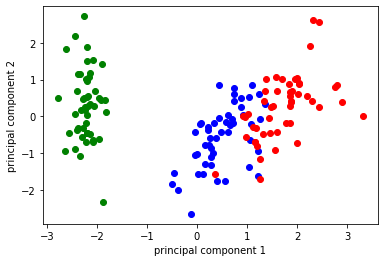

In [38]:
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['g', 'b', 'r']

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

for target, col in zip(targets,colors):
    dftemp = final_dataframe[df.target==target]
    plt.scatter(dftemp['principal component 1'], dftemp['principal component 2'], color=col)

In [39]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [40]:
pca.explained_variance_ratio_.sum()

0.9580097536148199